## Reading Data

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('data_email_campaign.csv')
data.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [4]:
data.shape

(68353, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [6]:
data.Email_Status.value_counts(normalize = True)

0    0.803783
1    0.161500
2    0.034717
Name: Email_Status, dtype: float64

In [7]:
data = data[data["Email_Status"] != 2]
data.Email_Status.value_counts(normalize = True)

0    0.832692
1    0.167308
Name: Email_Status, dtype: float64

Dataset is highly impabalanced.
Negative percentage = 83.4%
Positive percentage = 16.7%

In [8]:
data.isnull().sum()*100/len(data)

Email_ID                      0.000000
Email_Type                    0.000000
Subject_Hotness_Score         0.000000
Email_Source_Type             0.000000
Customer_Location            16.973325
Email_Campaign_Type           0.000000
Total_Past_Communications     9.965141
Time_Email_sent_Category      0.000000
Word_Count                    0.000000
Total_Links                   3.217642
Total_Images                  2.455289
Email_Status                  0.000000
dtype: float64

In [9]:
data.drop(columns = ['Email_ID','Customer_Location'], axis =1, inplace = True)

In [10]:
data.dropna(inplace = True)

## Exploratory Data Analysis

### Numeric features

In [11]:
num_cols = data.select_dtypes(include = 'number').columns
num_cols

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

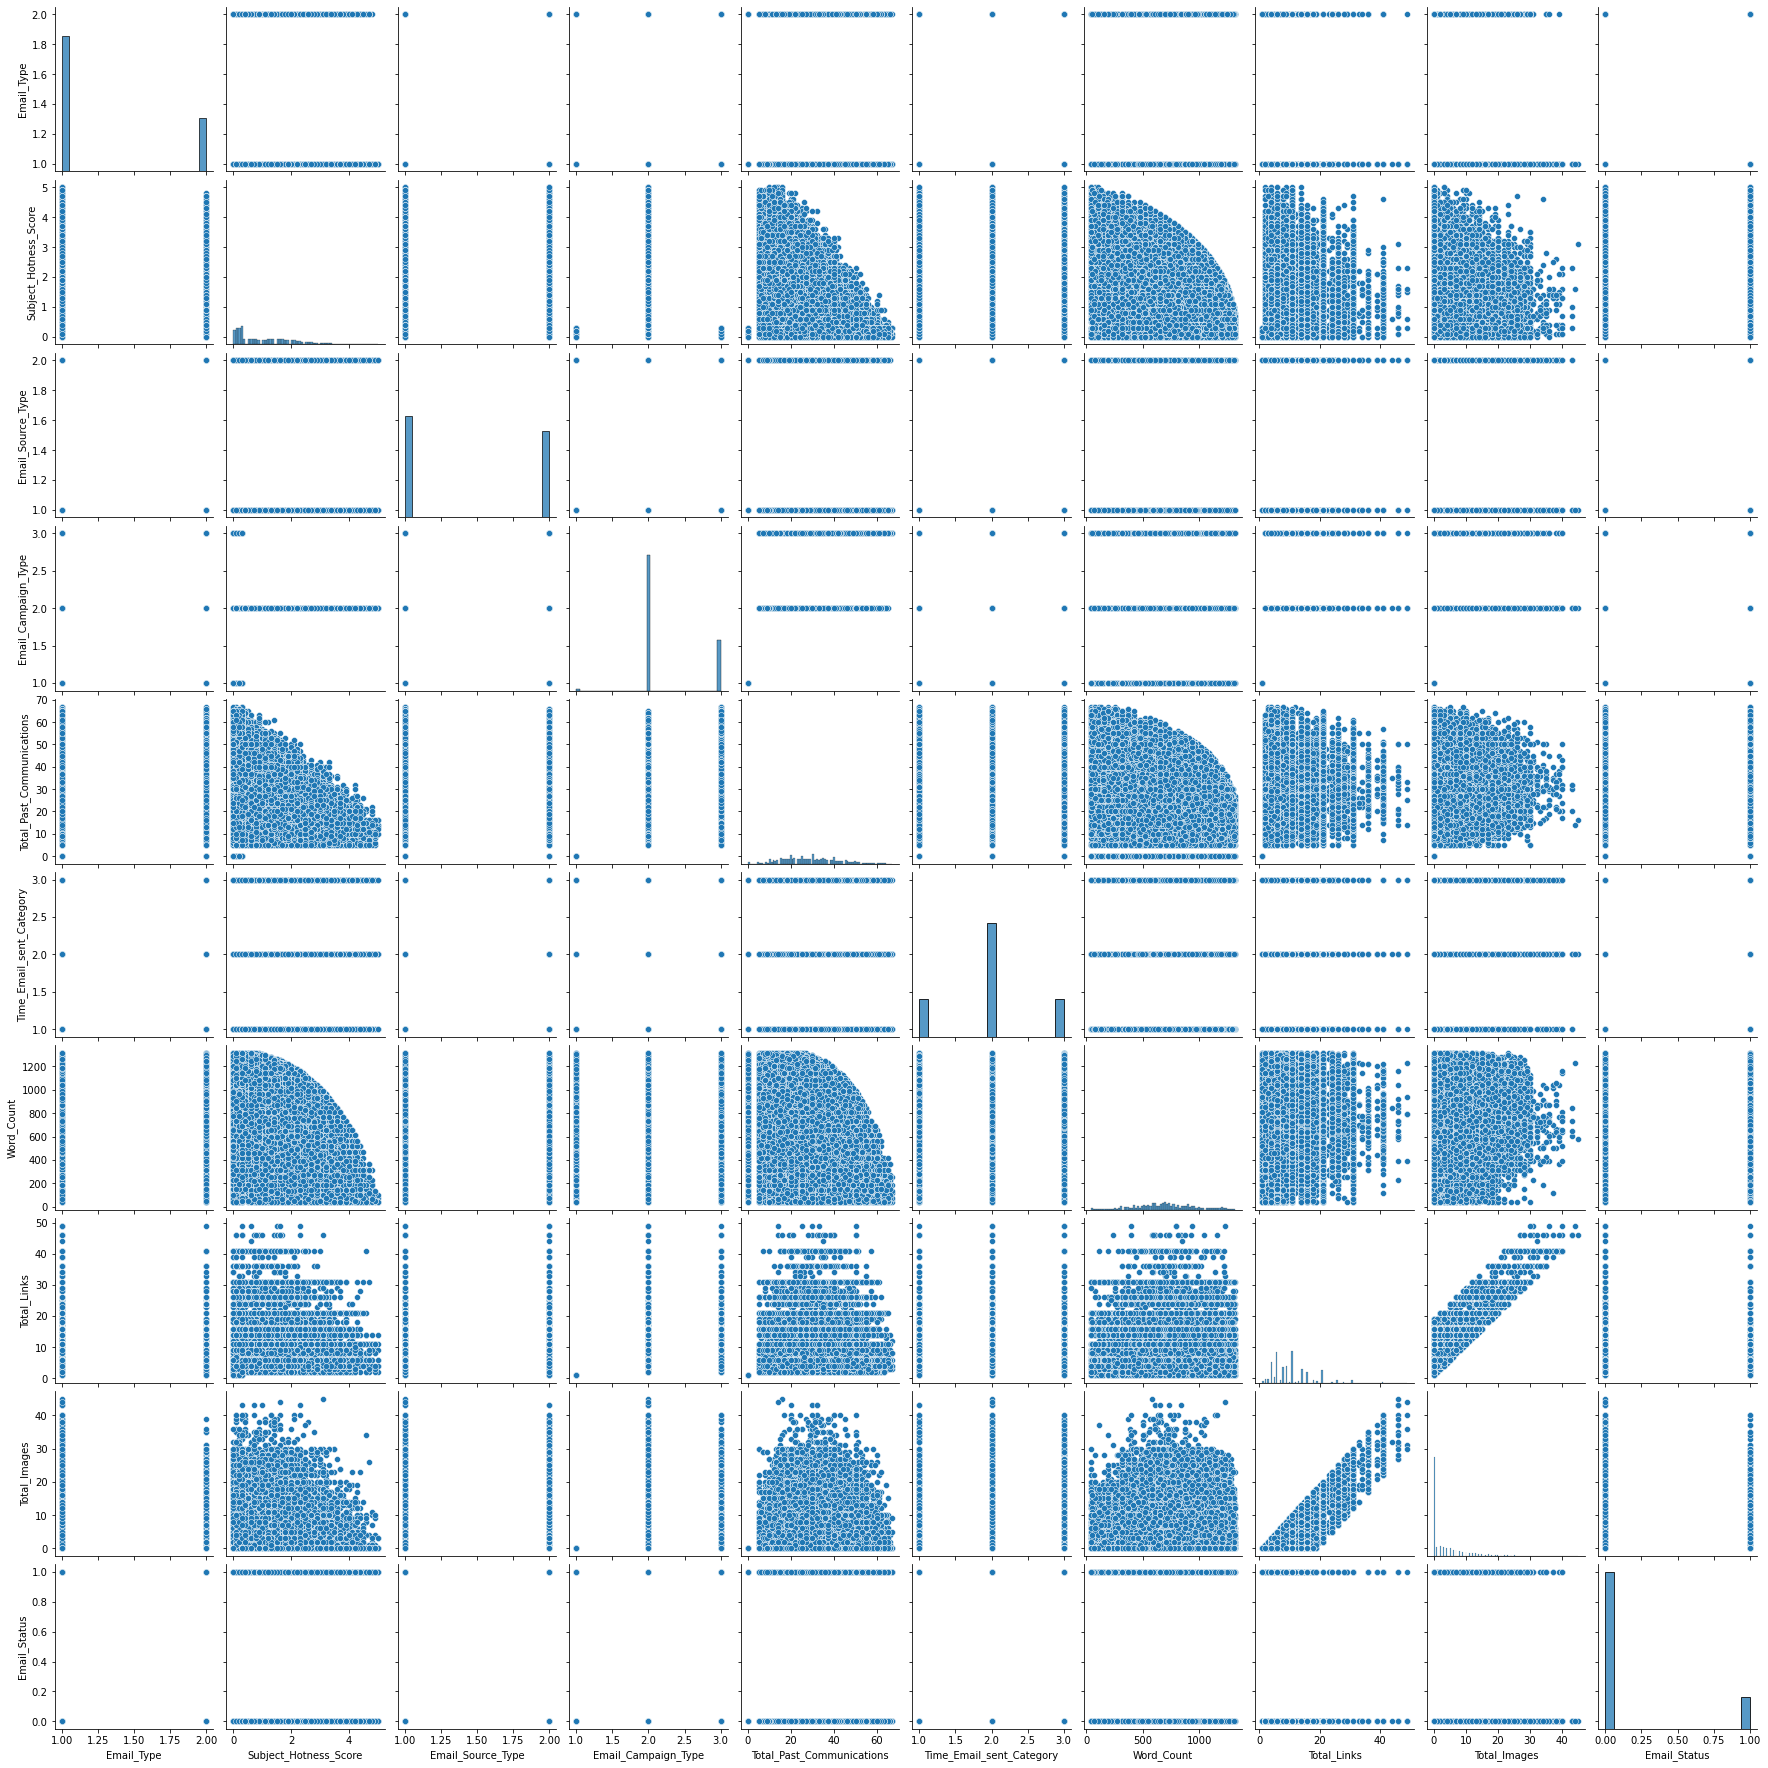

In [203]:
sns.pairplot(data)

## Model Building

### Simple logistic regression base model

In [12]:
from sklearn.model_selection import train_test_split

In [30]:
df_train, df_test = train_test_split(data, test_size = 0.25, random_state = 123, stratify=data['Email_Status'])

In [14]:
df_train.shape, df_test.shape

((42066, 10), (14023, 10))

In [15]:
df_train['Email_Status'].value_counts(normalize = True)

0    0.832549
1    0.167451
Name: Email_Status, dtype: float64

In [16]:
df_test['Email_Status'].value_counts(normalize= True)

0    0.832561
1    0.167439
Name: Email_Status, dtype: float64

In [17]:
# Verifying numeric variable distribution for implementing feature scaling
df_train.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,42066.000000,42066.000000,42066.000000,42066.000000,42066.000000,42066.000000,42066.000000,42066.000000,42066.000000,42066.000000
mean,1.283792,1.115687,1.458779,2.262397,28.607545,1.999358,702.028883,10.448914,3.542148,0.167451
std,0.450843,0.999737,0.498304,0.458673,12.356125,0.631797,271.541134,6.416605,5.603330,0.373383
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.900000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,37.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,44.000000,1.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
y_train = df_train['Email_Status']
X_train = df_train[[col for col in df_train.columns if col != 'Email_Status']]

In [21]:
y_train.value_counts()

0    35022
1     7044
Name: Email_Status, dtype: int64

In [22]:
X_train.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images
43542,1,1.1,1,2,22.0,2,542,6.0,0.0
40358,1,0.2,2,2,30.0,2,902,4.0,0.0
66688,2,2.1,1,2,20.0,1,841,8.0,0.0
6455,1,1.8,1,2,18.0,2,623,31.0,26.0
26786,1,0.9,1,2,20.0,3,1038,14.0,0.0


In [23]:
X_train[X_train.columns] = scaler.fit_transform(X_train)

In [24]:
X_train.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images
43542,0.0,0.22,0.0,0.5,0.328358,0.5,0.393417,0.104167,0.000000
40358,0.0,0.04,1.0,0.5,0.447761,0.5,0.675549,0.062500,0.000000
66688,1.0,0.42,0.0,0.5,0.298507,0.0,0.627743,0.145833,0.000000
6455,0.0,0.36,0.0,0.5,0.268657,0.5,0.456897,0.625000,0.590909
26786,0.0,0.18,0.0,0.5,0.298507,1.0,0.782132,0.270833,0.000000


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logreg = LogisticRegression(random_state = 123)

In [27]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=123)

#### Evaluating Base Model Performance

In [28]:
y_train_pred = logreg.predict(X_train)

In [31]:
y_test = df_test['Email_Status']
X_test = df_test[[col for col in df_train.columns if col != 'Email_Status']]

In [32]:
X_test[X_test.columns] = scaler.transform(X_test)

In [33]:
y_test_pred = logreg.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
print("Train accuracy:",accuracy_score(y_train, y_train_pred))

Train accuracy: 0.8329767508201398


In [36]:
confusion_matrix(y_train, y_train_pred)

array([[34655,   367],
       [ 6659,   385]], dtype=int64)

In [37]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     35022
           1       0.51      0.05      0.10      7044

    accuracy                           0.83     42066
   macro avg       0.68      0.52      0.50     42066
weighted avg       0.78      0.83      0.77     42066



Clearly, the logistic model is not performing well when predicting successful email campaigns as the recall in this case is merely 5%. The accuracy score of the model could be misleading because of the imbalance in the dataset. 84% accuracy is very close to the proportion of zeros in the dataset, which could imply that the model is basically labelling all examples as a 0.

In [41]:
# Using RandomForest to make predictions on the unseen test set

print("Test Accuracy:",accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.8344862012408186
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     11675
           1       0.56      0.05      0.10      2348

    accuracy                           0.83     14023
   macro avg       0.70      0.52      0.50     14023
weighted avg       0.79      0.83      0.77     14023



## Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Building a base model without any hyper-parameter tuning
rf = RandomForestClassifier(random_state = 123, n_estimators = 50, oob_score = True)

rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)

print("Train Accuracy:",accuracy_score(y_train, y_train_pred_rf))
print(classification_report(y_train, y_train_pred_rf))

Train Accuracy: 0.9984785812770408
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35022
           1       1.00      0.99      1.00      7044

    accuracy                           1.00     42066
   macro avg       1.00      1.00      1.00     42066
weighted avg       1.00      1.00      1.00     42066



Tree model even though they are in the form of an ensemble have a high tendency to overfit train data. The performance of our untuned RandomForestClassifier is almost perfect on the train data. There is a good chance that the classifier has memorized the train data.

To test it's performance on unseen data we could either evaluate it on the test test ot get a cross-validation score of the model's performance on the train set.

In [40]:
# Using RandomForest to make predictions on the unseen test set

y_test_pred_rf = rf.predict(X_test)
print("Test Accuracy:",accuracy_score(y_test, y_test_pred_rf))
print(classification_report(y_test, y_test_pred_rf))

Test Accuracy: 0.8352706268273551
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     11675
           1       0.52      0.22      0.31      2348

    accuracy                           0.84     14023
   macro avg       0.69      0.59      0.61     14023
weighted avg       0.80      0.84      0.81     14023



Performance of the RandomForest model is significantly better on both train set and unseen data. We could surely improve the performance of our ensemble with hyperparameter tuning.

#### Model Evaluation: Cross-Validation

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
# CV score (Recall) of logistic regression model
cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=-1, scoring='recall').mean()

0.05493963320214208

In [44]:
# CV score (Recall) of rf model
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1, scoring='recall').mean()

0.20102133605393896

In [45]:
rf.oob_score_

0.830480673227785

#### Exploring scoring methods in sklearn

In [46]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [47]:
# CV score (accuracy) of logreg model
cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=-1).mean()

0.8332144489505147

In [48]:
# CV score (accuracy) of rf model
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1).mean()

0.8352826371379981

## Feature Selection

### Recurssive Feature Elimination

In [49]:
from sklearn.feature_selection import RFE

In [124]:
help(RFE)

Help on class RFE in module sklearn.feature_selection._rfe:

class RFE(sklearn.feature_selection._base.SelectorMixin, sklearn.base.MetaEstimatorMixin, sklearn.base.BaseEstimator)
 |  RFE(estimator, *, n_features_to_select=None, step=1, verbose=0, importance_getter='auto')
 |  
 |  Feature ranking with recursive feature elimination.
 |  
 |  Given an external estimator that assigns weights to features (e.g., the
 |  coefficients of a linear model), the goal of recursive feature elimination
 |  (RFE) is to select features by recursively considering smaller and smaller
 |  sets of features. First, the estimator is trained on the initial set of
 |  features and the importance of each feature is obtained either through
 |  any specific attribute or callable.
 |  Then, the least important features are pruned from current set of features.
 |  That procedure is recursively repeated on the pruned set until the desired
 |  number of features to select is eventually reached.
 |  
 |  Read more in

In [50]:
rfe = RFE(logreg, n_features_to_select = 5, step=1)

In [51]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(random_state=123), n_features_to_select=5)

In [52]:
X_train.columns[rfe.support_]

Index(['Email_Campaign_Type', 'Total_Past_Communications', 'Word_Count',
       'Total_Links', 'Total_Images'],
      dtype='object')

In [53]:
X_train_rfe = X_train.loc[:,X_train.columns[rfe.support_]]
X_train_rfe.head()

,Email_Campaign_Type,Total_Past_Communications,Word_Count,Total_Links,Total_Images
43542,0.5,0.328358,0.393417,0.104167,0.000000
40358,0.5,0.447761,0.675549,0.062500,0.000000
66688,0.5,0.298507,0.627743,0.145833,0.000000
6455,0.5,0.268657,0.456897,0.625000,0.590909
26786,0.5,0.298507,0.782132,0.270833,0.000000


In [54]:
cross_val_score(logreg, X_train_rfe, y_train, n_jobs=-1, scoring = 'recall')

array([0.05180979, 0.04261364, 0.0489709 , 0.04116395, 0.0489709 ])

## Hyperparameter Tuning using Cross-Validation

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [57]:
rf = RandomForestClassifier(random_state=123, n_jobs=-1, oob_score=True)

In [134]:
params = {'n_estimators':[10,20,50],
         'max_depth': [3, 5, 10, 15],
         'max_features': [3, 5, 7],
         'min_samples_leaf': [20, 50, 100, 200]}

In [135]:
?GridSearchCV

In [136]:
model_gcv = GridSearchCV(estimator = rf,
                        param_grid = params,
                        scoring='recall',
                        n_jobs=-1,
                        return_train_score = True,
                        verbose = 1)

In [137]:
%%time
model_gcv.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Wall time: 3min 46s


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15], 'max_features': [3, 5, 7],
                         'min_samples_leaf': [20, 50, 100, 200],
                         'n_estimators': [10, 20, 50]},
             return_train_score=True, scoring='recall', verbose=1)

In [138]:
model_gcv.best_score_

0.17759885718433446

In [140]:
model_gcv.best_estimator_

RandomForestClassifier(max_depth=15, max_features=7, min_samples_leaf=20,
                       n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=123)

## Solving Class Imbalance

#### Undersampling

In [58]:
# Undersampling

shuffled_data = df_train.sample(frac = 1, random_state=42)
shuffled_data.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
32420,1,1.8,2,2,15.0,2,684,8.0,1.0,0
763,1,1.6,2,2,16.0,2,934,4.0,1.0,0
34157,2,0.2,1,3,46.0,2,721,6.0,0.0,0
59513,2,0.5,1,2,11.0,3,812,4.0,2.0,0
41573,2,0.2,1,3,8.0,2,1229,6.0,1.0,0


In [98]:
success_data = shuffled_data[shuffled_data["Email_Status"] == 1]
fail_data = shuffled_data[shuffled_data["Email_Status"] == 0].sample(n=4*len(success_data), random_state = 42)

us_data = pd.concat([success_data, fail_data])

In [99]:
len(success_data), len(fail_data)

(7044, 28176)

In [100]:
y_train_us = us_data['Email_Status']
X_train_us = us_data[[col for col in us_data.columns if col != 'Email_Status']]

In [101]:
y_train_us.shape, X_train_us.shape

((35220,), (35220, 9))

In [108]:
# RandomForestClassifier for undersampled data
rf_us = RandomForestClassifier(random_state=42, oob_score=True, verbose=2, n_jobs=-1)


# Hyperparameter tuning using RandomizedSearchCV
params_rcv = {'max_depth': range(3, 20),
                'max_features': range(3, 10),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 101, 10)}

model_rcv_us = RandomizedSearchCV(estimator=rf_us,
                                 param_distributions=params_rcv,
                                 cv=5,
                                 n_iter=50,
                                 n_jobs=-1,
                                 verbose=2,
                                 random_state=42,
                                 return_train_score=True)

model_rcv_us.fit(X_train_us, y_train_us)

In [121]:
print("Best score rcv:", model_rcv_us.best_score_,'\n')
print("Best Estimator:",model_rcv_us.best_estimator_)

Best score rcv: 0.8171777399204997 

Best Estimator: RandomForestClassifier(max_depth=14, max_features=4, min_samples_leaf=120,
                       n_estimators=60, n_jobs=-1, oob_score=True,
                       random_state=42, verbose=2)


In [112]:
from sklearn.metrics import accuracy_score, recall_score

Test Accuracy: 0.16743920701704343
Test Recall: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11675
           1       0.17      1.00      0.29      2348

    accuracy                           0.17     14023
   macro avg       0.08      0.50      0.14     14023
weighted avg       0.03      0.17      0.05     14023



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:    0.0s finished


In [122]:
y_test_pred_rf_us = model_rcv_us.best_estimator_.predict(X_test)
print("Test Accuracy:",accuracy_score(y_test, y_test_pred_rf_us))
print("Test Recall:",recall_score(y_test, y_test_pred_rf_us))
print(classification_report(y_test, y_test_pred_rf_us))

Test Accuracy: 0.16743920701704343
Test Recall: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11675
           1       0.17      1.00      0.29      2348

    accuracy                           0.17     14023
   macro avg       0.08      0.50      0.14     14023
weighted avg       0.03      0.17      0.05     14023



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:    0.0s finished


### Oversampling Using SMOTE

In [113]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(df_train.drop('Email_Status', axis=1), df_train['Email_Status'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.columns = df_train.columns

In [114]:
oversampled_trainX.head()


,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images
0,1,1.1,1,2,22.0,2,542,6.0,0.0
1,1,0.2,2,2,30.0,2,902,4.0,0.0
2,2,2.1,1,2,20.0,1,841,8.0,0.0
3,1,1.8,1,2,18.0,2,623,31.0,26.0
4,1,0.9,1,2,20.0,3,1038,14.0,0.0


In [94]:
df_train.shape

(42066, 10)

In [95]:
oversampled_train.shape

(70044, 10)

In [96]:
oversampled_trainY.value_counts(normalize=True)

0    0.5
1    0.5
Name: Email_Status, dtype: float64

In [127]:
# RandomForestClassifier for undersampled data
rf_os = RandomForestClassifier(random_state=42, oob_score=True, verbose=2, n_jobs=-1)


# Hyperparameter tuning using RandomizedSearchCV
params_rcv = {'max_depth': range(3, 20),
                'max_features': range(3, 10),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 101, 10)}

model_rcv_os = RandomizedSearchCV(estimator=rf_os,
                                 param_distributions=params_rcv,
                                 cv=5,
                                 scoring='recall',
                                 n_iter=50,
                                 n_jobs=-1,
                                 verbose=2,
                                 random_state=42,
                                 return_train_score=True)

model_rcv_us.fit(oversampled_trainX, oversampled_trainY)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 30building tree 2 of 30building tree 3 of 30

building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30

building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30building tree 12 of 30

building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.0s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=42,
                                                    verbose=2),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(3, 10),
                                        'min_samples_leaf': range(20, 400, 50),
                                        'n_estimators': range(10, 101, 10)},
                   random_state=42, return_train_score=True, verbose=2)

In [128]:
print("Best score rcv:", model_rcv_us.best_score_,'\n')
print("Best Estimator:",model_rcv_us.best_estimator_)

Best score rcv: 0.808292726194334 

Best Estimator: RandomForestClassifier(max_depth=17, max_features=9, min_samples_leaf=20,
                       n_estimators=30, n_jobs=-1, oob_score=True,
                       random_state=42, verbose=2)


In [129]:
y_test_pred_rf_os = model_rcv_us.best_estimator_.predict(X_test)
print("Test Accuracy:",accuracy_score(y_test, y_test_pred_rf_os))
print("Test Recall:",recall_score(y_test, y_test_pred_rf_os))
print(classification_report(y_test, y_test_pred_rf_os))

Test Accuracy: 0.16743920701704343
Test Recall: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11675
           1       0.17      1.00      0.29      2348

    accuracy                           0.17     14023
   macro avg       0.08      0.50      0.14     14023
weighted avg       0.03      0.17      0.05     14023



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
